![This is an image](Quant-Trading.jpg)

<font size="3">
Please visit our website <a href="https://www.quant-trading.co" target="_blank">quant-trading.co</a> for more tools on quantitative finance and data science.
</font>

# **HOW TO MAKE A BAR CHART FOR FINANCIAL ASSETS' PERFORMANCE?**

## **Bar chart**

<font size="3"> A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. he Matplotlib bar() function is one of the easiest way to create a bar chart.<br><br> 
    
<font size="3"> In this notebook we will use Yahoo Finance Data for 10Y treasury yields and then arrange it into daily up and down changes in basis points. Then we will use the bar chart to plot the results and differentiate them using different colors. We will also count the events that are below or above a certain threashold. If you want to know how to download the data from the yahoo finance API please take a look  <a href="https://quant-trading.co/how-to-download-data-from-yahoo-finance-api/" target="_blank">here</a>
<br><br>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, PercentFormatter

## **Download the data**

<font size="3"> We do as usual with the yahoo finance API. 
<br><br>

In [2]:
Ticker = '^TNX'
my_ticker = yf.Ticker(Ticker)

#DATES
start_date = datetime.datetime(2023, 12, 31)
end_date = datetime.datetime(2024, 4, 15)

prices_hist = my_ticker.history(start=start_date,end=end_date)
prices_hist.reset_index(inplace=True)

prices_hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-01-02,3.969,3.973,3.918,3.946,0,0,0
1,2024-01-03,3.978,4.008,3.894,3.907,0,0,0
2,2024-01-04,3.974,4.006,3.971,3.991,0,0,0
3,2024-01-05,4.038,4.099,3.953,4.042,0,0,0
4,2024-01-08,4.059,4.063,3.966,4.002,0,0,0
...,...,...,...,...,...,...,...,...
66,2024-04-08,4.458,4.462,4.406,4.424,0,0,0
67,2024-04-09,4.384,4.396,4.358,4.366,0,0,0
68,2024-04-10,4.346,4.568,4.344,4.560,0,0,0
69,2024-04-11,4.576,4.591,4.515,4.576,0,0,0


## **Calculate daily changes in basis points and also max and min changes**

   
<font size="3"> We will use the shift function as we learnt <a href="https://quant-trading.co/mean-and-median-return-calculations-using-python/" target="_blank">here</a>  
    
<br><br>

In [3]:
prices_hist['Change'] = prices_hist['Close'] - prices_hist['Close'].shift(1)
prices_hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Change
0,2024-01-02,3.969,3.973,3.918,3.946,0,0,0,NaN
1,2024-01-03,3.978,4.008,3.894,3.907,0,0,0,-0.039
2,2024-01-04,3.974,4.006,3.971,3.991,0,0,0,0.084
3,2024-01-05,4.038,4.099,3.953,4.042,0,0,0,0.051
4,2024-01-08,4.059,4.063,3.966,4.002,0,0,0,-0.040
...,...,...,...,...,...,...,...,...,...
66,2024-04-08,4.458,4.462,4.406,4.424,0,0,0,0.046
67,2024-04-09,4.384,4.396,4.358,4.366,0,0,0,-0.058
68,2024-04-10,4.346,4.568,4.344,4.560,0,0,0,0.194
69,2024-04-11,4.576,4.591,4.515,4.576,0,0,0,0.016


In [4]:
#Y-AXIS MAX AND MIN VALUES  
min_value = prices_hist['Change'].min()
max_value = prices_hist['Change'].max()
my_range = max_value - min_value

## **Calculate positive and negative changes**

   
<font size="3"> We will use the loc function to filter positive and negative changes and store them in different DataFrames.
<br><br>

In [5]:
prices_hist_pos = prices_hist.loc[np.sign(prices_hist['Change'])==1]
prices_hist_neg = prices_hist.loc[np.sign(prices_hist['Change'])==-1]

prices_hist_pos.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Change
2,2024-01-04,3.974,4.006,3.971,3.991,0,0,0,0.084
3,2024-01-05,4.038,4.099,3.953,4.042,0,0,0,0.051
5,2024-01-09,4.047,4.053,3.996,4.019,0,0,0,0.017
6,2024-01-10,3.992,4.038,3.985,4.030,0,0,0,0.011
9,2024-01-16,4.003,4.083,3.990,4.066,0,0,0,0.116
10,2024-01-17,4.081,4.129,4.075,4.106,0,0,0,0.040
11,2024-01-18,4.090,4.154,4.090,4.144,0,0,0,0.038
12,2024-01-19,4.132,4.198,4.132,4.146,0,0,0,0.002
14,2024-01-23,4.130,4.155,4.121,4.142,0,0,0,0.048
15,2024-01-24,4.099,4.188,4.086,4.178,0,0,0,0.036


## **Create the bar chart**

   
<font size="3"> We will use the bar function of the matplotlib library. Below you can find an example on how to do that.
<br><br>

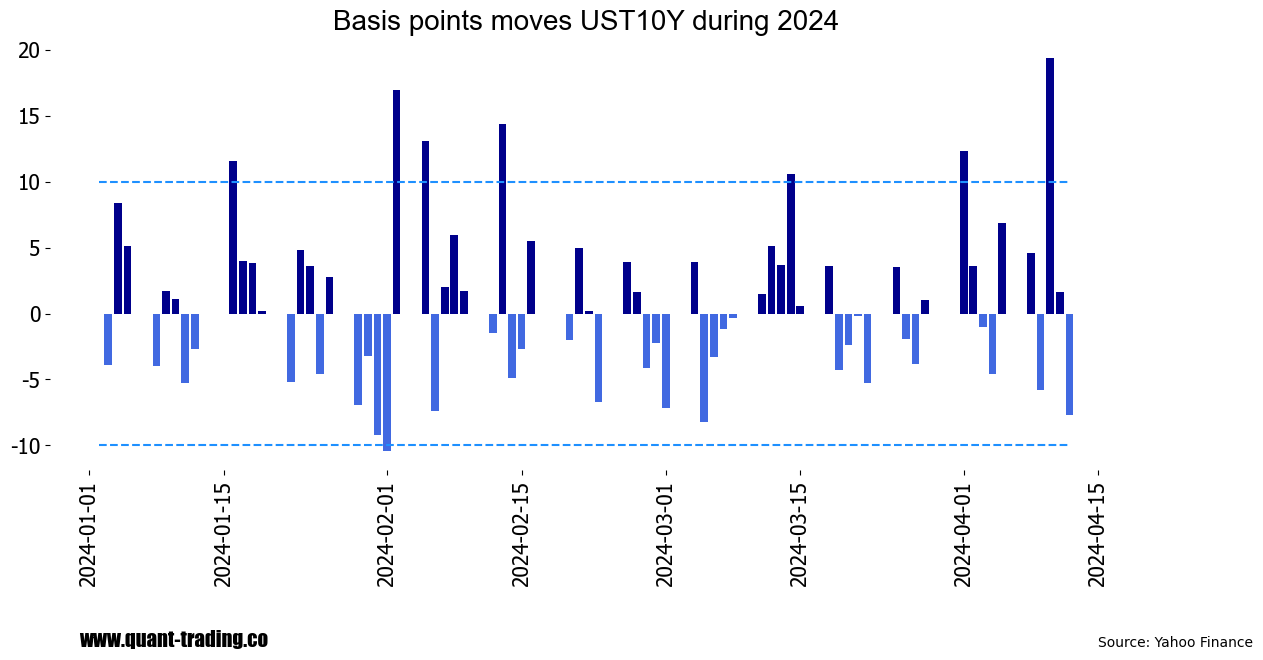

In [6]:
fig = plt.figure()


ax1 = fig.add_subplot(1, 1, 1,frameon=False)
ax1.bar(prices_hist_pos['Date'],prices_hist_pos['Change']*100,color='darkblue')
ax1.bar(prices_hist_neg['Date'],prices_hist_neg['Change']*100,color='royalblue')
ax1.plot(prices_hist['Date'],10*np.ones(prices_hist.shape[0]),linestyle='dashed', color='dodgerblue')
ax1.plot(prices_hist['Date'],-10*np.ones(prices_hist.shape[0]),linestyle='dashed', color='dodgerblue')
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.axis([None, None, None, None])
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.title("Basis points moves UST10Y during 2024", size=20, family='Arial')

plt.text(start_date, (min_value-my_range/2)*100,'www.quant-trading.co' , color='black', fontsize=15,family='Impact')
plt.text(end_date, (min_value-my_range/2)*100,'Source: Yahoo Finance' , color='black', fontsize=10)

plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

## **Calculate the observations above or below a threashold**

   
<font size="3"> We will get the particular observations that are above or below a certain threashold. In this case, it is 10 basis points.
<br><br>

In [7]:
threashold_data_up = prices_hist_pos.loc[prices_hist_pos['Change']>0.10]
threashold_data_up.reset_index(inplace=True)
threashold_data_up

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Change
0,9,2024-01-16,4.003,4.083,3.990,4.066,0,0,0,0.116
1,22,2024-02-02,3.889,4.054,3.887,4.033,0,0,0,0.170
2,23,2024-02-05,4.112,4.177,4.110,4.164,0,0,0,0.131
3,29,2024-02-13,4.152,4.316,4.150,4.316,0,0,0,0.144
4,50,2024-03-14,4.196,4.300,4.192,4.298,0,0,0,0.106
5,61,2024-04-01,4.234,4.337,4.234,4.329,0,0,0,0.123
6,68,2024-04-10,4.346,4.568,4.344,4.560,0,0,0,0.194


In [8]:
threashold_data_down = prices_hist_neg.loc[prices_hist_neg['Change']<-0.1]
threashold_data_down.reset_index(inplace=True)
threashold_data_down

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Change
0,21,2024-02-01,3.927,3.927,3.817,3.863,0,0,0,-0.104


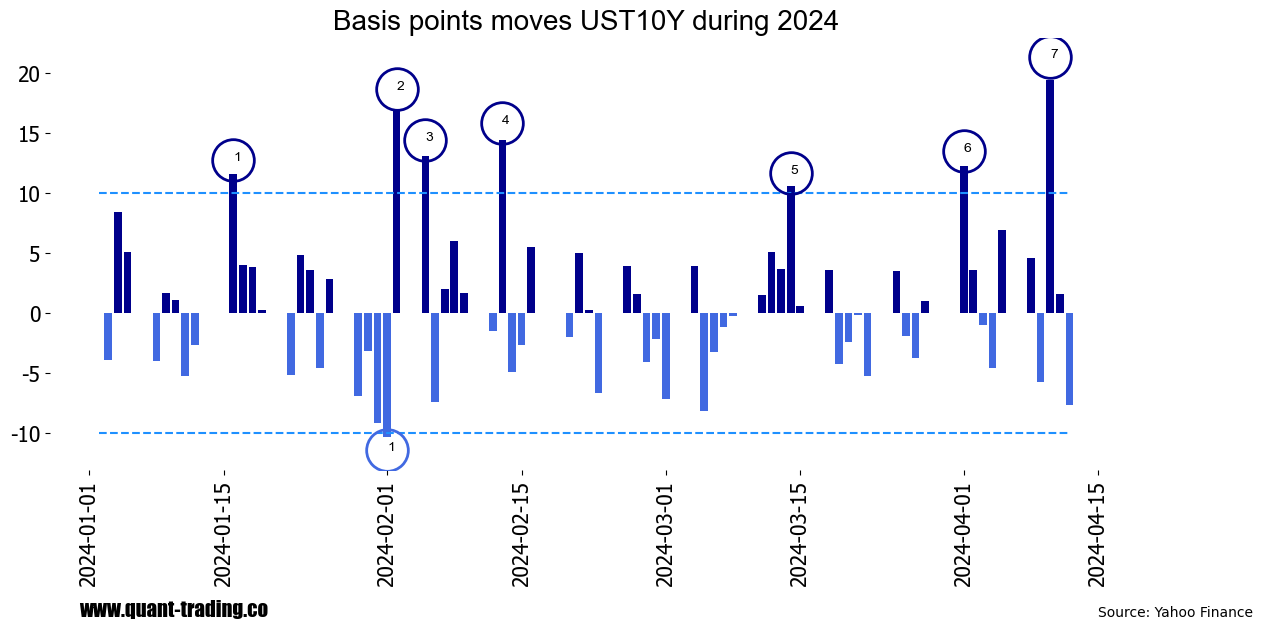

In [9]:
fig = plt.figure()

prices_hist_pos = prices_hist.loc[np.sign(prices_hist['Change'])==1]
prices_hist_neg = prices_hist.loc[np.sign(prices_hist['Change'])==-1]

ax1 = fig.add_subplot(1, 1, 1,frameon=False)
ax1.bar(prices_hist_pos['Date'],prices_hist_pos['Change']*100,color='darkblue')
ax1.bar(prices_hist_neg['Date'],prices_hist_neg['Change']*100,color='royalblue')
ax1.plot(prices_hist['Date'],10*np.ones(prices_hist.shape[0]),linestyle='dashed', color='dodgerblue')
ax1.plot(prices_hist['Date'],-10*np.ones(prices_hist.shape[0]),linestyle='dashed', color='dodgerblue')
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.axis([None, None, None, None])
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax1.set_facecolor('white')
plt.title("Basis points moves UST10Y during 2024", size=20, family='Arial')

for i in range(0,threashold_data_up.shape[0]):
    ax1.text(threashold_data_up['Date'].iloc[i], threashold_data_up['Change'].iloc[i]*100*1.1,threashold_data_up.index[i]+1 , color='black', fontsize=10,family='Arial')
    ax1.plot(threashold_data_up['Date'].iloc[i], threashold_data_up['Change'].iloc[i]*100*1.1, 'o', ms= 15 * 2, mec='darkblue', mfc='none', mew=2)


for i in range(0,threashold_data_down.shape[0]):
    ax1.text(threashold_data_down['Date'].iloc[i], threashold_data_down['Change'].iloc[i]*100*1.1,threashold_data_down.index[i]+1 , color='black', fontsize=10,family='Arial')
    ax1.plot(threashold_data_down['Date'].iloc[i], threashold_data_down['Change'].iloc[i]*100*1.1, 'o', ms= 15 * 2, mec='royalblue', mfc='none', mew=2)
    
    
    
plt.text(start_date, (min_value-my_range/2)*100,'www.quant-trading.co' , color='black', fontsize=15,family='Impact')
plt.text(end_date, (min_value-my_range/2)*100,'Source: Yahoo Finance' , color='black', fontsize=10)
   

plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

If this content is helpful and you want to make a donation please click on the button below. It helps us maintain this site.

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)